Q1

In [119]:
import sympy as sp 
t=sp.symbols('t')
T1,T2=sp.Function('T_1')(t),sp.Function('T_2')(t)
M1=1000
M2=500
C=1000
Q=1000
UA=1000
M=100
m=10
Tin=60
T0=20
tank1=sp.Eq(T1.diff(t)*M1*C,M*C*(Tin-T1)+m*C*(T2-T1)-(m+M)*C*(T1-T2)-UA*(T1-T0))
tank2=sp.Eq(T2.diff(t)*M2*C,(m+M)*C*(T1-T2)-m*C*(T2-T1)-M*C*(T2-T0)+Q)
display(sp.solve(tank1,T1.diff(t))[0].evalf(),sp.solve(tank2,T2.diff(t))[0].evalf())

-0.221*T_1(t) + 0.12*T_2(t) + 6.02

0.24*T_1(t) - 0.44*T_2(t) + 4.002

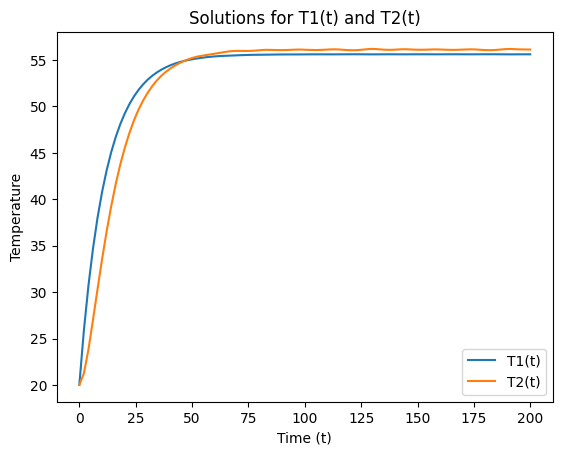

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funcs(t, T):
    T1, T2 = T
    dT1dt=-0.1*T1+0.01*T2+5
    dT2dt=0.2*T1-0.2*T2+0.1
    return [dT1dt, dT2dt]
ics = [20,20]
time = 200
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(funcs, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temperature")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()

In [128]:
A=sp.Matrix([[-0.1,0.01],[0.2,-0.2]])
sp.pprint(A.eigenvects())

⎡⎛                        ⎡⎡0.505207702981219⎤⎤⎞  ⎛                       ⎡⎡-0
⎢⎜-0.0829179606750063, 1, ⎢⎢                 ⎥⎥⎟, ⎜-0.217082039324994, 1, ⎢⎢  
⎣⎝                        ⎣⎣0.862997784961491⎦⎦⎠  ⎝                       ⎣⎣1.

.10417810068372⎤⎤⎞⎤
               ⎥⎥⎟⎥
21973844810545 ⎦⎦⎠⎦


In [120]:
a,b=sp.symbols('a b')
x=-(0.1*a-0.01*b)+5
y=-(-0.2*a+0.2*b)+0.1
sp.solve([x,y],[a,b])

{a: 55.6111111111111, b: 56.1111111111111}

In [130]:
c1,c2=sp.symbols('C_1 C_2')

t1=c1*0.505*sp.exp(-0.0829*t)+c2*-0.104*sp.exp(-0.217*t)+55.61
t2=c1*0.863*sp.exp(-0.0829*t)+c2*1.22*sp.exp(-0.217*t)+56.11

sp.solve([t1.subs(t,0)-20,t2.subs(t,0)-20],[c1,c2])
Tank1=t1.subs(c1,-66.8690320350442).subs(c2,17.7032579067567)
Tank2=t2.subs(c1,-66.8690320350442).subs(c2,17.7032579067567)
display(Tank1,Tank2)

55.61 - 1.8411388223027*exp(-0.217*t) - 33.7688611776973*exp(-0.0829*t)

56.11 + 21.5979746462432*exp(-0.217*t) - 57.7079746462431*exp(-0.0829*t)

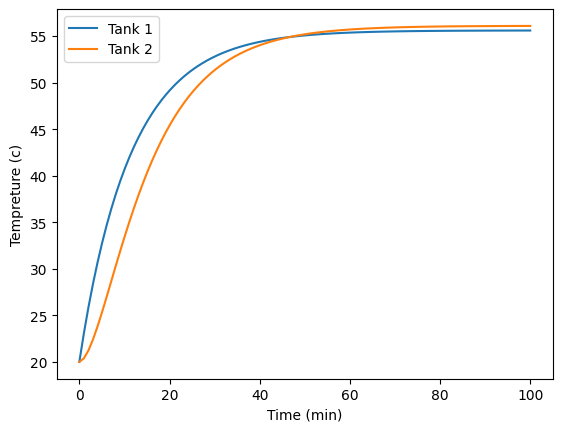

In [135]:
import numpy as np
import matplotlib.pylab as plt
time = np.linspace(0, 100, 100)

x1_values = [Tank1.subs(t, ti) for ti in time]
x2_values = [Tank2.subs(t, ti) for ti in time]

plt.plot(time, x1_values, label='Tank 1')
plt.plot(time, x2_values, label='Tank 2')
plt.xlabel('Time (min)')
plt.ylabel('Tempreture (c)')
plt.legend()
plt.show()

Q2

In [1]:
import sympy as sp

a,b,t,l=sp.symbols('a b theta lambda')

f=0.25*a*a*b*sp.sin(t)
g=a*b+0.5*a*a*sp.sin(t)-10

x,y,z=f.diff(a)-l*g.diff(a),f.diff(b)-l*g.diff(b),f.diff(t)-l*g.diff(t)
display(x,y,z)

0.5*a*b*sin(theta) - lambda*(1.0*a*sin(theta) + b)

0.25*a**2*sin(theta) - a*lambda

0.25*a**2*b*cos(theta) - 0.5*a**2*lambda*cos(theta)

In [19]:
A1=sp.solve(y,a)[1]
B1=sp.solve(x.subs(a,A1),b)[0]
t1=sp.solve(z.subs(a,A1).subs(b,B1),t)
display(t1[0],t1[1])

1.57079632679490

4.71238898038469

1.57 radians in rougly 90 degrees, 4.7 is around 270
1.57 makes more sence

In [24]:
t2=t1[0]
A2=A1.subs(t,t2)
display(A2,B1,t2)

4.0*lambda

4.0*lambda

1.57079632679490

In [29]:
L = sp.solve(g.subs(a,A2).subs(b,B1).subs(t,t2),l)[1]
L

0.645497224367903

In [39]:
display('a=',A2.subs(l,L),'b=',B1.subs(l,L),'t=',t2)

'a='

2.58198889747161

'b='

2.58198889747161

't='

1.57079632679490

In [41]:
display('V=',f.subs(a,2.58198889747161).subs(b,2.58198889747161).subs(t,1.5707963267949))

'V='

4.30331482911935

In [51]:
x,y=sp.symbols('x y ')
sp.integrate(1/(1+y*y*y),(x,0,y*y),(y,0,2)).evalf()

0.732408192445406

In [113]:
import sympy as sp

A=sp.Matrix([[1,1/3],[9,6]])
sp.pprint(A.eigenvects()[0])
sp.pprint(A.eigenvects()[1])

⎛                     ⎡⎡0.524297781285182⎤⎤⎞
⎜0.45861873485089, 1, ⎢⎢                 ⎥⎥⎟
⎝                     ⎣⎣-0.85153498844113⎦⎦⎠
⎛                     ⎡⎡0.0733581942064676⎤⎤⎞
⎜6.54138126514911, 1, ⎢⎢                  ⎥⎥⎟
⎝                     ⎣⎣ 1.21951716906267 ⎦⎦⎠


In [114]:
a,b,t=sp.symbols('a b t')
x=(4*a+b/3)*sp.exp(t)-3*sp.exp(t)-a*sp.exp(t)
y=(9*a+6*b)*sp.exp(t)-10*sp.exp(t)-b*sp.exp(t)
sp.solve([x,y],[a,b])



{a: 35/36, b: 1/4}

In [117]:
c1,c2 =sp.symbols('C_1 C_2')

X=c1*0.524*sp.exp(0.459*t)+c2*0.0734*sp.exp(6.54*t)+35/36*sp.exp(t)
Y=c1*-0.852*sp.exp(0.459*t)+c2*1.22*sp.exp(6.54*t)+1/4*sp.exp(t)
sp.solve([X,Y],[c1,c2])
sol1=X.subs(c1,-1.66391159503607*sp.exp(0.541*t)).subs(c2,-1.36692842538585*sp.exp(-5.54*t))
sol2=Y.subs(c1,-1.66391159503607*sp.exp(0.541*t)).subs(c2,-1.36692842538585*sp.exp(-5.54*t))
display(sol1,sol2)

0.972222222222222*exp(t) - 0.972222222222222*exp(1.0*t)

0.25*exp(t) - 0.250000000000005*exp(1.0*t)

D:\Users\Hamish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1335: RuntimeWarning: overflow encountered in cast
  return np.asarray(x, float)


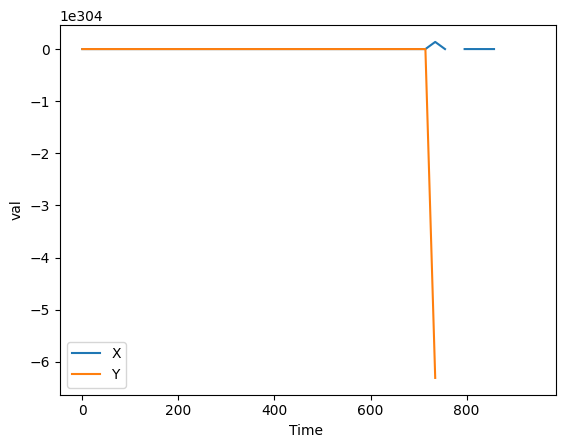

In [118]:
import numpy as np
import matplotlib.pylab as plt
time = np.linspace(0, 1000, 50)

x1_values = [sol1.subs(t, ti) for ti in time]
x2_values = [sol2.subs(t, ti) for ti in time]

plt.plot(time, x1_values, label='X')
plt.plot(time, x2_values, label='Y')
plt.xlabel('Time ')
plt.ylabel('val')
plt.legend()
plt.show()